# Demonstrate convolution theorem for softened grating

## Import stuff

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import fft as fft

In [6]:
import sys
sys.path.append('../packages/')
#from grating2 import *
import grating2
from auxiliary import *

## Demonstrate partial FT terms of grating

The two forms look different - **but they should not!**

The fft is not normalized - **needs to be done yet!**

There are no axis labels, titles and the like - **add them!**

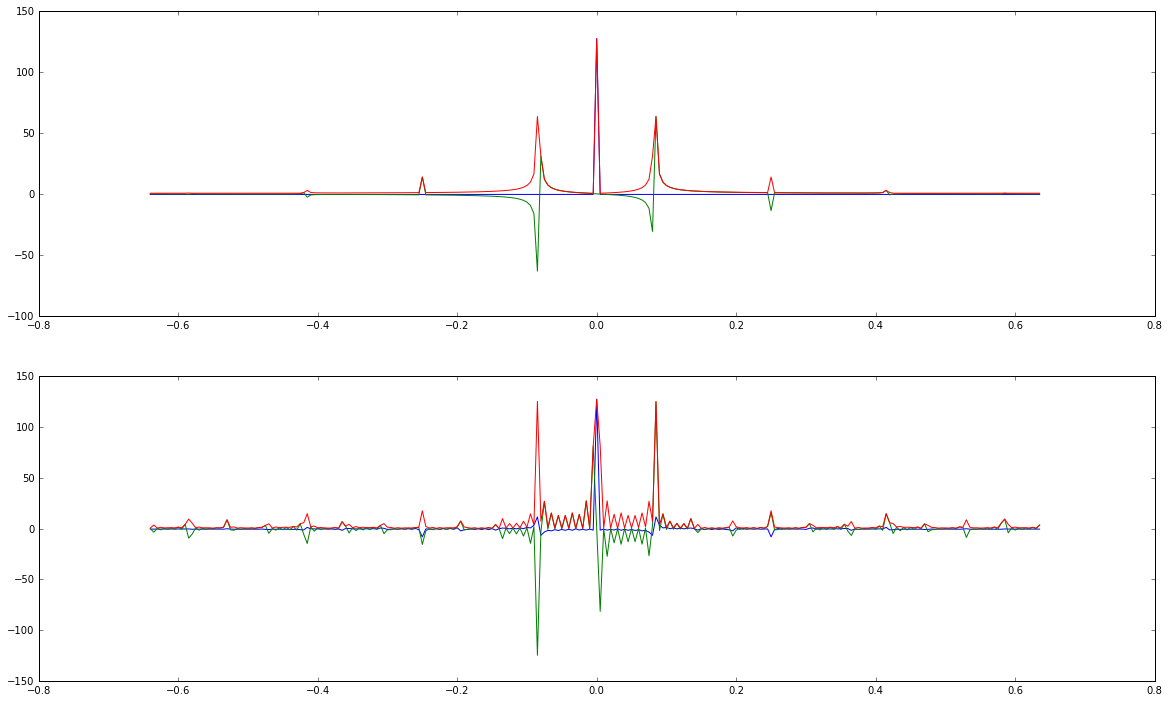

In [7]:
# Define full time domain function
sigma         = 1.
mu            = 0.
fct_t_edge    = grating2.make_erf_edge(sigma, mu)

pitch         = 12.
fsize         = 6.
fct_t_feat    = grating2.make_box(pitch, fsize, fct_t_edge)

offset        = 0.
fct_t_grating = grating2.make_periodical(pitch, fct_t_feat, offset)

# Define time domain
tres          = 256
tmin          = -100.
tmax          = -tmin * (tres-2) / tres
t             = np.linspace(tmin, tmax, tres)

# Sample full time domain function, FFT sample
g_full        = fct_t_grating(t)
G_full        = fft.fftshift(fft.fft(g_full))
f             = fft.fftshift(fft.fftfreq(tres, t[1]-t[0]))

# Define time domain terms
fct_t_comb    = lambda t : grating2.make_comb(pitch, t[1]-t[0])(t) - grating2.make_comb(pitch, t[1]-t[0])(t-fsize)

# Sample time domain terms, FFT samples
g_comb        = fct_t_comb(t)
G_comb        = fft.fftshift(fft.fft(g_comb))

g_edge        = fct_t_edge(t)
g_edge        = swap_center_border(g_edge)
G_edge        = fft.fftshift(fft.fft(g_edge))



# Plot
fig = plt.figure(figsize=(20, 12))
sub1 = fig.add_subplot(2, 1, 1)
plot_complex(f, G_full, angl=False, axes=sub1)

sub2 = fig.add_subplot(2, 1, 2)
plot_complex(f, G_comb*G_edge, angl=False, axes=sub2)